## Lectura del fichero de datos

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv', header = 0)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('El dataframe tiene ',df.shape[0], 'observaciones y ',df.shape[1],' variables')

El dataframe tiene  891 observaciones y  12  variables


## Descripción de los datos

El conjunto de datos tiene 12 columnas o varables:

* Passenger ID: ID to identity each passenger
* Name
* Age
* Survived: Survival: 0 = No, 1 = Yes
* Pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
* SibSp: # of siblings / spouses aboard the Titanic:
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: # of parents / children aboard the Titanic:
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson.
    Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation:
    C = Cherbourg
    Q = Queenstown
    S = Southampton

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Importancia y objetivos de los análisis

A partir de este conjunto de datos que representa distintas características de un grupo de 890 pasajeros del Titanic, se pretende por un lado determinar cuáles son las variables que más influyeron para que un pasajero sobreviva o no y también crear un modelo de regresión logística que dadas ciertas características de una persona nos devuelva la probabilidad de supervivencia. Tambíen podremos aplicar contrastes de hipótesis que nos ayudarán a resolver preguntas interesantes de la muestra para luego inferirlas a la población.

Es interesante resolver estas preguntas para entender qué se hizo mal en esa situación y modificar las medidas de rescate, prevención, salidas de emergencia, para que en caso de que otro barco de esas dimensiones se hunda no haya que lamentar víctimas fatales.

## 4. Análisis de los datos

In [7]:
#Función para graficar las variables con respecto a la variable target: Survived

def graficar_variable(data, variable, target):
    ax = data.groupby([variable, target]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [8]:
#Función para mostrar en forma de tabla las categorias dentro de cada columna y el porcentaje al que
#corresponde cada una con respecto al total de datos

def crear_tabla(dataset,variable):
    tabla = df.groupby([variable,'Survived']).size().unstack(level = 1) 
    tabla.columns = ['No_sobrevivio', 'Sobrevivio']
    tabla['Porcentaje_dataset'] = tabla.apply(lambda x: (x.Sobrevivio + x.No_sobrevivio)*100/len(df), axis = 1)
    tabla.sort_values(by = ['Porcentaje_dataset'],  ascending = False, inplace = True)
    return tabla

### `PassengerId`

Identificador del pasajero. Es una variable numerica correlativa, que no tiene ningún valor predictivo. No la incluiremos en nuestro modelo.

In [9]:
df.drop(['PassengerId'], axis=1, inplace=True)

### `Ticket`

Número del tiquet del pasajero. Es alfanumerica y no la vamos a considerar para el modelo.

In [10]:
df.drop(['Ticket'], axis=1, inplace=True)

### `Survived`

Indica si el pasajero sobrevivió (`1`) o no (`0`).
Será nuestra variable a predecir. es decir la variable dependiente.
Vemos que hay alrededor de un 38% de pasajeros que sobrevivieron.

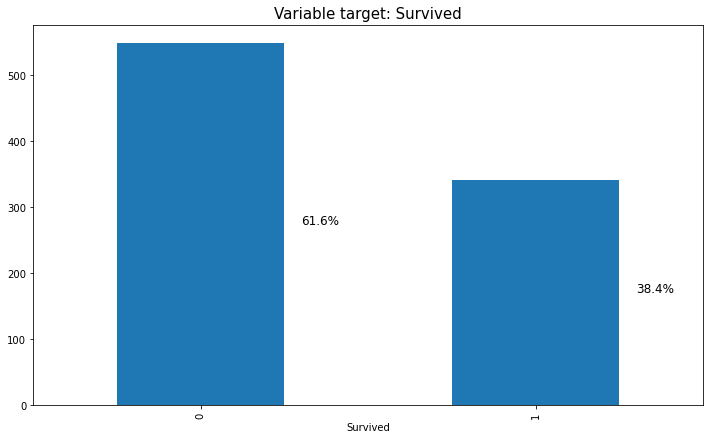

In [11]:
ax = df.groupby(['Survived']).size().plot(kind = 'bar', stacked=True, figsize = (12,7))
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), fontsize = 12)
    
plt.title('Variable target: Survived', fontsize = 15)
plt.show()

### `Pclass`

Clase del tiquet. Es una variable categórica, con 3 valores diferentes correspondientes a la primera, la segunda y la tercera clase. 
Vemos que está correlacionada con la supervivencia: como más alta sea la clase, más supervivientes hay.

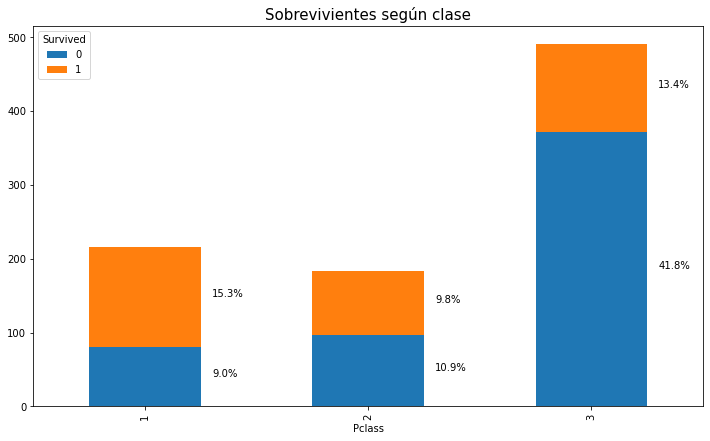

In [12]:
graficar_variable(df,df['Pclass'], df['Survived'])
plt.title('Sobrevivientes según clase', fontsize = 15)
plt.show()

In [13]:
crear_tabla(df,df['Pclass'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
Pclass,,,
3,372,119,55.106622
1,80,136,24.242424
2,97,87,20.650954


In [14]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Teniendo en cuenta el gráfico y las tablas anteriores vemos que, los pasajeros de 3ra clase representan el 55% del dataset, seguido de los de primera clase que representan el 24,24% y por último la clase 2 que son el 20% restante. 
Dentro de cada grupo, vemos que el mayor porcentaje de sobrevivientes se da en el grupo de primera clase: un 63% de estos pasajeros sobrevivieron, mientras que sólo el 24% de los pasajeros de clase 3 lo hicieron. 

### `Sex`

Sexo del pasajero. Es una variable categórica con dos valores, `male` y `female`. 
La convertiremos a binaria para nuestro análisis.
Vemos que el 74% de mujeres sobrevivio, vs un 19% de hombres, por lo tanto, el sexo es una variable importante para determinar si un pasajero sobrevivio o no. 

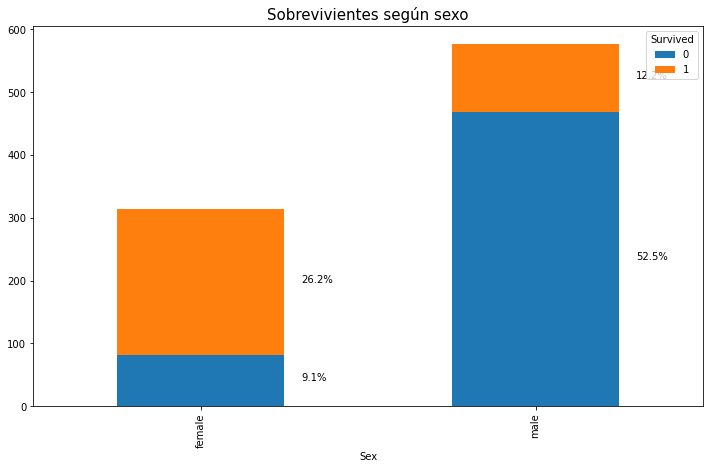

In [15]:
graficar_variable(df,df['Sex'], df['Survived'])
plt.title('Sobrevivientes según sexo', fontsize = 15)
plt.show()

In [16]:
crear_tabla(df,df['Sex'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
Sex,,,
male,468,109,64.758698
female,81,233,35.241302


In [17]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Vemos que el 65% del dataset son paseros de sexo masculino, de los cuales sólo el 19% sobrevivió.
El 35% restante son mujeres, y el porcentaje de sobrevivientes dentro de este grupo es del 74%.

Si tomamos toda la población, sobrevivieron un 26,2% de mujeres y un 12,2% de hombres. 

Convertimos la variable en numérica:

In [18]:
df['Sex'] = df['Sex'].replace(['male'],1)
df['Sex'] = df['Sex'].replace(['female'],0)

### `SibSp`

Número de hermanos o cónyugues del pasajero dentro del Titanic. Es una variable numérica.
Podemos ver que aquellos que viajaban con 1 hermano o cónyugue fueron el grupo que mas sobrevivientes tuvo. 

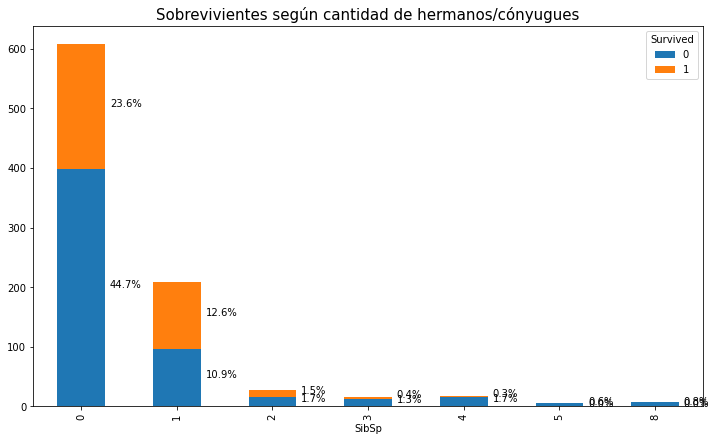

In [19]:
graficar_variable(df,df['SibSp'], df['Survived'])
plt.title('Sobrevivientes según cantidad de hermanos/cónyugues', fontsize = 15)
plt.show()

In [20]:
crear_tabla(df,df['SibSp'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
SibSp,,,
0,398.0,210.0,68.237935
1,97.0,112.0,23.456790
2,15.0,13.0,3.142536
4,15.0,3.0,2.020202
3,12.0,4.0,1.795735
5,5.0,NaN,NaN
8,7.0,NaN,NaN


In [21]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


El 68% de los pasajeros no estaban acompañados ni por hermanos ni por sus cónyugues, luego hay un 23,4% que iban acompañados por unó solo de ellos, el resto de los grupos tienen porcentajes menor al 5% del total.
Si analizamos los grupos por separado, de aquellos que iban con un hermano o cónyugue un 54% sobrevivió, siendo el grupo que le sigue en mayor porcentaje el que está formado por 2 hermanos/cónyugues, con un 46% de sobrevivientes.
Si lo vemos a nivel general, tomando a todos los pasajeros, el 23,6% de los sobrevivientes fueron solos, y el 12.6% de sobrevivientes fue con un acompañante, los porcentajes de los siguientes grupos son menores al 2%.

### `Parch`

Número de padres e hijos del pasajero dentro del Titanic. Es una variable numérica.
Aquellos que viajaban con tres padres o tres hijos, o una combinación de ellos que de tres, son los que más sobrevivieron.

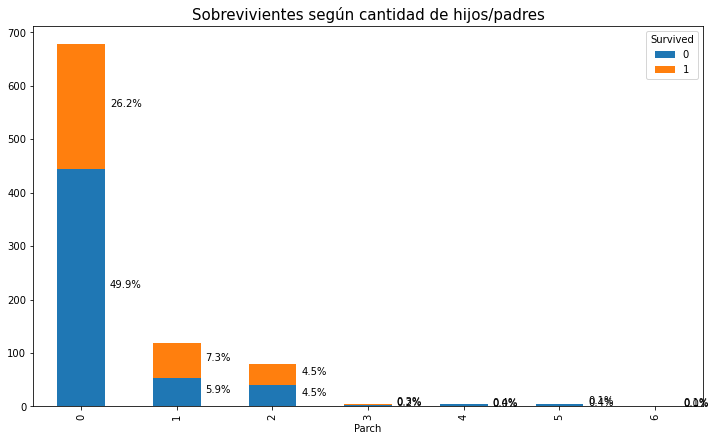

In [22]:
graficar_variable(df,df['Parch'], df['Survived'])
plt.title('Sobrevivientes según cantidad de hijos/padres', fontsize = 15)
plt.show()

In [23]:
crear_tabla(df,df['Parch'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
Parch,,,
0,445.0,233.0,76.094276
1,53.0,65.0,13.243547
2,40.0,40.0,8.978676
3,2.0,3.0,0.561167
5,4.0,1.0,0.561167
4,4.0,NaN,NaN
6,1.0,NaN,NaN


In [24]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


El 76% de los pasajeros del dataset fueron sin hijos y sin padres. Luego, el 13% fue acompañados por sólo un padre o un hijo, y hay un 8% que fueron con 2 de ellos. Luego, el resto de los grupos corresponden a menos del 1% de la población.
Analizando cada grupo por separado, dentro del grupo mayoritario que fueron solos, el 34% sobrevivió. Dentro del grupo de 1 acompañante, el 55% sobrevivió y tomando el grupo de 2 acompañantes el 50% sobrevivió.
Tomando los valores generales de toda la muestra, el mayor porcentaje de sobrevivientes es del grupo que fue sólo, con el 26,2% de sobrvivientes, seguido de aquellos que fueron con un padre o hijo, que corresponde al 7.3%. 

### `FamilySize`

Con las variables `SibSp` y `Parch` podemos calcular el tamaño de la familia de un pasajero, que llamaremos `FamilySize`.

Las familias con 4 integrantes conforman el grupo que más sobrevivientes tuvo. Seguido por las de 3 y luego las de 2 integrantes. 

In [25]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

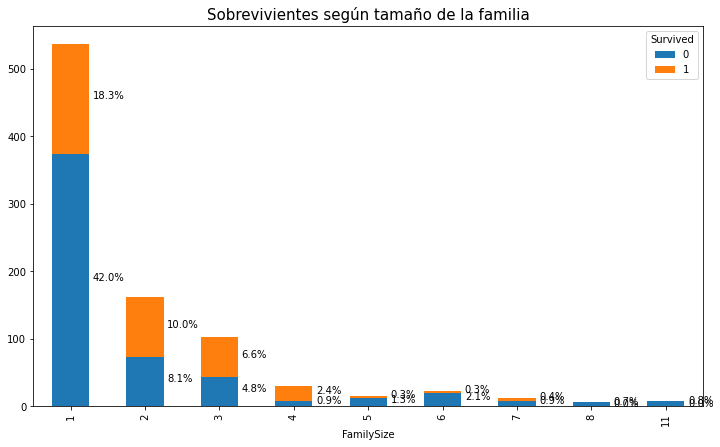

In [26]:
graficar_variable(df,df['FamilySize'], df['Survived'])
plt.title('Sobrevivientes según tamaño de la familia', fontsize = 15)
plt.show()

In [27]:
crear_tabla(df,df['FamilySize'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
FamilySize,,,
1,374.0,163.0,60.269360
2,72.0,89.0,18.069585
3,43.0,59.0,11.447811
4,8.0,21.0,3.254770
6,19.0,3.0,2.469136
5,12.0,3.0,1.683502
7,8.0,4.0,1.346801
8,6.0,NaN,NaN
11,7.0,NaN,NaN


In [28]:
df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


El 60% del dataset está formado por pasajeros que fueron solos, ya que el tamaño de su familia indica 1. El siguiente grupo en mayor porcentaje es el de familias formadas por dos integrantes, los cuales representan el 18% del dataset y luego los de 3 integrantes representan el 11,4%. El resto corresponden a grupo de menos del 5%. 
Si analizamos cada grupo por separado, del grupo de sólo 1 integrante, sobrevivió el 30%, pero a nivel general este grupo es el que más sobrevivientes tuvo, el 18,3%. 
Dentro del grupo de 2 integrantes, el 55% sobrevivió, pero a nivel general, esto corresponde al 10%.

Como la variable FamilySize incluye las variables Parch y SibSp, eliminaremos estas últimas.

In [29]:
df.drop(['SibSp'], axis=1, inplace=True)
df.drop(['Parch'], axis=1, inplace=True)

### `Embarked`

Indica el puerto de embarque del pasajero. Es una variable categórica donde `C` indica que embarcó en Cherbourg, `Q` en Queenstown y `S` en Southampton.

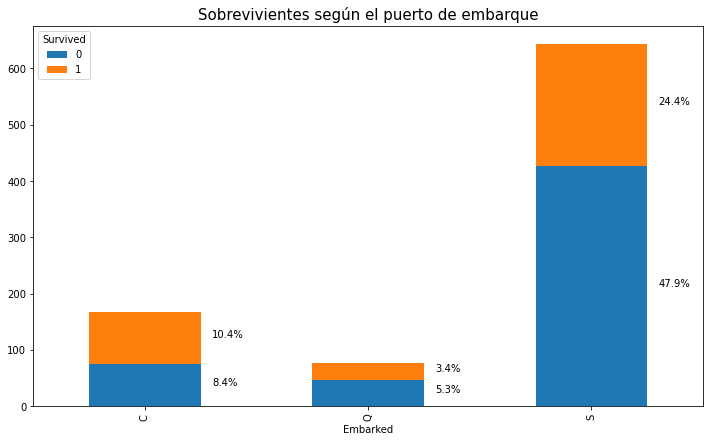

In [30]:
graficar_variable(df,df['Embarked'], df['Survived'])
plt.title('Sobrevivientes según el puerto de embarque', fontsize = 15)
plt.show()

In [31]:
crear_tabla(df,df['Embarked'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
Embarked,,,
S,427,217,72.278339
C,75,93,18.855219
Q,47,30,8.641975


In [32]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


El 72% de los pasajeros embarcaron en el puerto Southampton, el 19% en Cherbourg y el 9% restante en Queenstown. 
Analizando los grupos por separado, el 55% de los que embarcaron en Chercourg sobrevivieron, el 39% de los que embarcaron en Queenstown sobrevivieron y de los que lo hicieron en Southampton, sobrevivió el 34%.

La convertimos a variable numérica a través de variables dummy:

In [33]:
Embarked_dummy = pd.get_dummies(df['Embarked'])
df = pd.concat([df, Embarked_dummy], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,NaN,S,2,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C85,C,2,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,NaN,S,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,C123,S,2,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,NaN,S,1,0,0,1


### `Fare`

Indica el precio del pasaje. Es una variable numerica continua.

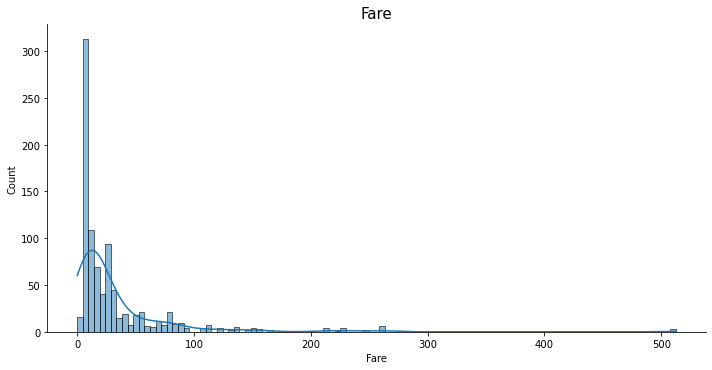

In [34]:
sns.displot(df['Fare'], kde=True, aspect = 2, height = 5)
plt.title('Fare', fontsize = 15)
plt.show()

## `Cabin`

Número de la cabina del pasajero. Es una variable de texto, que indica en qué cabina estaba el pasajero. 
No la consideraremos para nuestro análisis.

In [35]:
df.drop(['Cabin'], axis=1, inplace=True)

### `Age`

Edad del pasajero.
Categorizaremos la variable en 8 categorías según la edad que tenga. La categoría `Unknown` será la de aquellos pasajeros que no tengamos la edad.

In [36]:
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

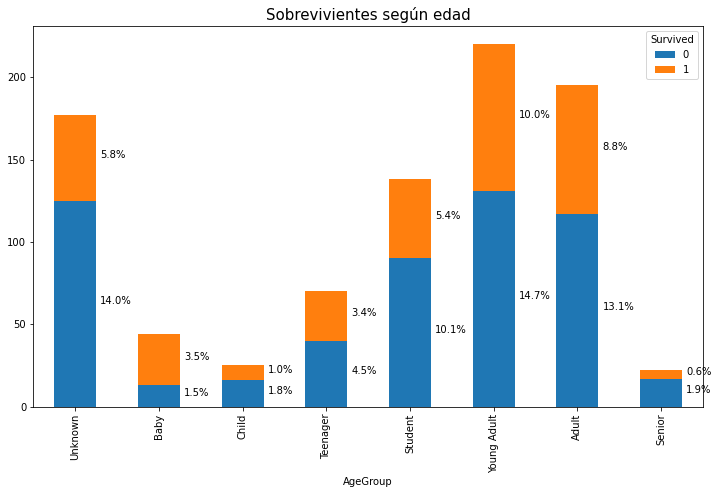

In [37]:
graficar_variable(df,df['AgeGroup'], df['Survived'])
plt.title('Sobrevivientes según edad', fontsize = 15)
plt.show()

In [38]:
crear_tabla(df,df['AgeGroup'])

,No_sobrevivio,Sobrevivio,Porcentaje_dataset
AgeGroup,,,
Young Adult,131,89,24.691358
Adult,117,78,21.885522
Unknown,125,52,19.865320
Student,90,48,15.488215
Teenager,40,30,7.856341
Baby,13,31,4.938272
Child,16,9,2.805836
Senior,17,5,2.469136


In [39]:
df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Survived
0,Unknown,0.293785
1,Baby,0.704545
2,Child,0.360000
3,Teenager,0.428571
4,Student,0.347826
5,Young Adult,0.404545
6,Adult,0.400000
7,Senior,0.227273


El 24,6% corresponde a la categoria "Young Adults" que son jóvenes de entre 24 y 35 años. El siguiente grupo mayoritario está formada por el grupo "Adult", que son los que tienen entre 35 y 60 años, y corresponden al 22% del dataset. Luego, el 20% corresponde a la categoría "Unknown" de los cuales no tenemos el dato.  
Tomando los grupos por separado, es de esperar que el mayor porcentaje de sobrevivientes lo tenga la categoría "Baby", seguido por los "Teenager".

### `Name`

Nombre del pasajero. Vamos a eliminar esta variable para el análisis

In [40]:
df.drop(['Name'], axis=1, inplace=True)

##### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (p. e., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?)

In [41]:
print('Las variables que hemos dejado son las siguientes:', df.columns)

Las variables que hemos dejado son las siguientes: Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'C', 'Q', 'S', 'AgeGroup'],
      dtype='object')


###### Comprobación de la normalidad y homogeneidad de la varianza

 - Normalidad

Con el objetivo de verificar la normalidad de los datos aplicaremos el test de Shapiro-Wilk. 
Asumiendo como hipótesis nula que la población está distribuida normalmente, si el p-value es menor al nivel de significancia, que definiremos como alfa = 0.05, entonces la hipótesis nula es rechazada y se concluye que los datos no cuentan con una distribución normal. Si, por el contrario, el p-value es mayor a alfa entonces no se puede rechazar la H0 y se asume que los datos siguen una distribución normal. 

En nuestro caso validaremos la normalidad de la variable numérica Fare y Age:

In [42]:
from scipy.stats import shapiro

#Variable Fare
shapiro(df['Fare'])

ShapiroResult(statistic=0.5218914747238159, pvalue=1.0789998175301091e-43)

Dado que el p-value es menor que alfa = 0.05 se rechaza la hipótesis nula y concluimos que la variable no tiene distribución normal.  
También podemos evaluarlo de manera gráfica con el gráfico cuantil-cuantil que compara los residuos del modelo con los valores de una variable que se distribuye normalmente:


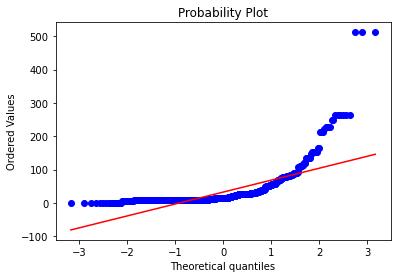

In [43]:
import scipy.stats as stats
import pylab 
stats.probplot(df['Fare'], dist="norm", plot=pylab)
plt.show()

Vemos que los puntos se alejan de la recta con distribución normal. 
Probamos aplicando el logaritmo para ver si podemos normalizar la distribucion de la variable:

In [44]:
df['Fare'] = np.log1p(df['Fare'])
#Variable Fare
shapiro(df['Fare'])

ShapiroResult(statistic=0.9152467846870422, pvalue=6.642045243763613e-22)

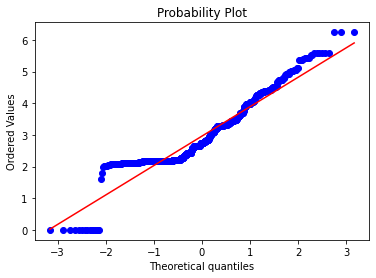

In [45]:
stats.probplot(df['Fare'], dist="norm", plot=pylab)
plt.show()

Vemos que aplicando el logaritmo el p-value sigue siendo menor que el alfa pero gráficamente podemos ver como los puntos se van acercarndo más a l adistribución normal.

A continuación aplicaremos otro test, el test de Kolmorogov-Smirnov para evaluar la normalidad de la variable 'Fare'

In [46]:
from scipy.stats import kstest
kstest(df['Fare'], 'norm')

KstestResult(statistic=0.9573983683814443, pvalue=0.0)

En este caso, el resultado está mucho más cercano al valor de alfa, pero el resultado coincide con el test de Shapiro-Wilk sobre el rechazo de la H0. 

Pero, teniendo en cuenta el Teorema del Límite Central, que indica que la media de una muestra es cada vez más normal a medida que aumenta la cantidad de observaciones. 
Se considera suficientemente grande a más de 30 observaciones, en este caso contamos con 891 valores, por lo que se podría considerar que la variable sigue una distribución normal.

In [47]:
df['Fare'].shape[0]

891

In [48]:
#Variable Age
df['Age'] = np.where(df['Age'] < 0, 0, df['Age'])
shapiro(df['Age'])

ShapiroResult(statistic=0.94334477186203, pvalue=5.901417096273313e-18)

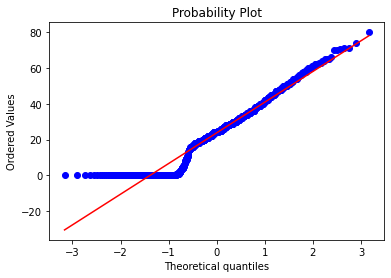

In [49]:
stats.probplot(df['Age'], dist="norm", plot=pylab)
plt.show()

En el caso de la variable 'Age' el p-value luego de aplicar el test de Shapiro-Wilks es menor al valor de alfa, por lo que no podemos asegurar la normalidad de la variable. El gráfico valida también este resultado, vemos que en uno de los extremos los valores se alejan de la recta con distribución normal, lo que podría indicar falta de normalidad en los datos.

Pero, aplicando nuevamente el Teorema del Límite Central, la variable se podría considerar normal debido a que tiene 891 observaciones.

- Homogeneidad de la varianza

Para el análisis de la *homogeneidad* de varianzas utilizaremos el test de Fligner-Killeen, ya que es un test no paramétrico, que se utiliza cuando las variables no siguen una distribución normal.
La hipótesis nula H0 asume igualdad de varianzas en los diferentes grupos de datos, por lo que p-values menores al nivel de significancia indicarán heterocedasticidad.

En este caso, estudiaremos esta homogeneidad entre los grupos conformados por mujeres y por hombres:

In [50]:
stats.fligner(df['Survived'], df['Sex'], center='mean')

FlignerResult(statistic=10.746465944041198, pvalue=0.0010447864597771198)

Obtuvimos un p-value menor al valor de significancia, por lo tanto se rechaza la hipótesis nula y concluimos que las varianzas de las muestras son distintas, es decir no hay la misma varianza en la muestra de hombres que de mujeres

Ahora aplicaremos el mismo método para evlauar la homogeneidad de varianzas  entre las muestras conformados por las distintas clases:

In [51]:
stats.fligner(df['Survived'], df['Pclass'], center='mean')

FlignerResult(statistic=585.8745259607911, pvalue=1.9781661175685402e-129)

En este caso el p-value tambien es menor al nivel de significancia por lo que las muestras tienen varianzas distintas. 

##### Aplicación de pruebas estadísticas para comparar los grupos de datos

######  1. ¿Qué variables cuantitativas influyen más en la supervivencia de un pasajero?

Para entender qué variable es más influyente calcularemos el coeficiente de correlación de Spearman ya que necesitamos un método no paramétrico por la falta de normalidad de las variables. 

Analizando la matriz de correlación que se muestra a continuación, vemos que la variable con mayor correlación con 'Survived' es Sex, seguido de Pclass y Fare. 

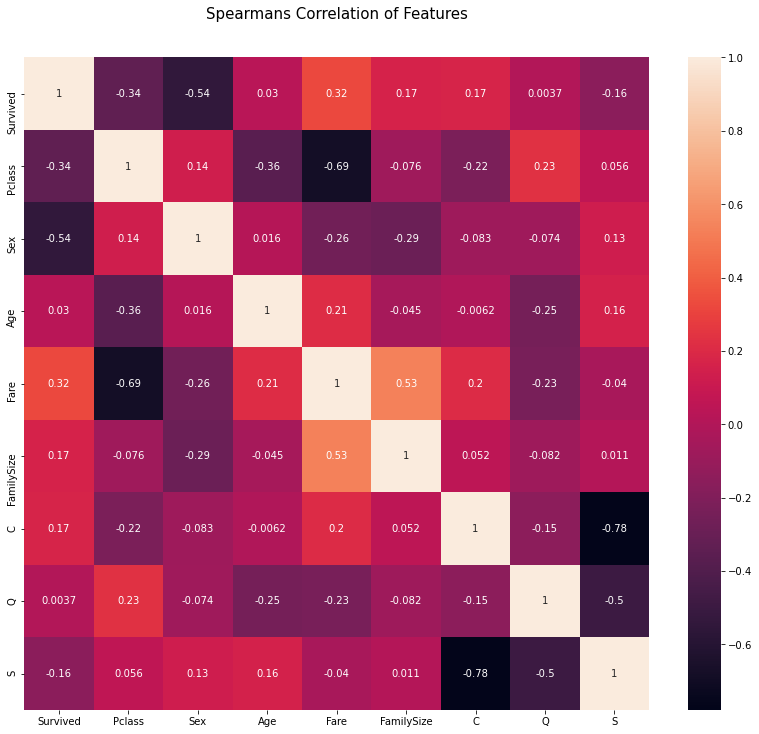

In [52]:
correlation_matrix = df.corr(method = 'spearman')
correlation_matrix

plt.figure(figsize=(14,12))
plt.title('Spearmans Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot = True);

Analizaremos la relación entre las 3 variables con mayor influencia con la variable 'Survived':

In [53]:
from scipy.stats import spearmanr

In [54]:
coef, p = spearmanr(df['Survived'], df['Sex'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('La variable Survived y Sex no están correlacionadas (se acepta H0) p=%.3f' % p)
else:
	print('La variable Survived y Sex están correlacionadas (se rechaza H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.543
La variable Survived y Sex están correlacionadas (se rechaza H0) p=0.000


In [55]:
coef, p = spearmanr(df['Survived'], df['Pclass'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('La variable Survived y Pclass no están correlacionadas (se acepta H0) p=%.3f' % p)
else:
	print('La variable Survived y Pclass están correlacionadas (se rechaza H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.340
La variable Survived y Pclass están correlacionadas (se rechaza H0) p=0.000


In [56]:
coef, p = spearmanr(df['Survived'], df['Fare'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('La variable Survived y Fare no están correlacionadas (se acepta H0) p=%.3f' % p)
else:
	print('La variable Survived y Fare están correlacionadas (se rechaza H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.324
La variable Survived y Fare están correlacionadas (se rechaza H0) p=0.000


Podemos determinar entonces que, de las variables que estamos evaluando, la variable que más influencia tiene en la supervivencia de los pasajeros es el sexo.

######  2.  ¿La proporción de sobrevivientes que embarcaron en el puerto Cherbourg es mayor que la cantidad de sobrevivientes que embarcaron en el puerto Queenstown?

La segunda prueba estadística que se aplicará consistirá en un contraste de hipótesis sobre la proporción de dos muestras para determinar si la supervivencia es mayor si el embarque fue en Cherbourg comparado con Queenstown.

Una de las muestras será la cantidad de sobrevivientes que embarcaron en el puerto Cherbourg, y la otra muestra será la cantidad de sobrevivientes que embarcaron en Queenstown.

La hipótesis nula es que las proporciones de las muestras son iguales, la hipótesis alternativa es la proporción de sobrevivientes que embarcaron en Cherbourg es mayor que los que embarcaron en Queenstown.
Para evaluar esto aplicaremos un test de proporción z de dos muestras.

In [57]:
from statsmodels.stats.proportion import proportions_ztest
alfa = 0.05
sample_C, sample_size_C = (df[(df['Embarked'] == 'C') & (df['Survived'] == 1)]['Embarked'].size, df[(df['Embarked'] == 'C') | (df['Embarked'] == 'Q') & (df['Survived'] == 1)]['Embarked'].size)
sample_Q, sample_size_Q = (df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)]['Embarked'].size, df[(df['Embarked'] == 'C') | (df['Embarked'] == 'Q') & (df['Survived'] == 1)]['Embarked'].size)

samples = np.array([sample_C, sample_Q], dtype = object)
samples_size = np.array([sample_size_C, sample_size_Q], dtype = object)

stat, p_value = proportions_ztest(count=samples, nobs=samples_size,  alternative='larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > alfa:
   print ("El p-value es mayor al valor de significancia de 0.05, por lo que no se puede rechazar la hipótesis nula y se concluye que las proporciones de las muestras son iguales")
else:
   print ("El p-value es menor al valor de significancia  de 0.05, por lo que se rechaza la hipótesis nula y se concluye que la muestra 1 es mayor que la muestra 2")


z_stat: 6.842, p_value: 0.000
El p-value es menor al valor de significancia  de 0.05, por lo que se rechaza la hipótesis nula y se concluye que la muestra 1 es mayor que la muestra 2


En nuestro caso la muestra 1 son los pasajeros sobrevivientes que embarcaron en el puerto Cherbourg, y la muestra 2 son los pasajeros sobrevivientes que embarcaron en el puerto Queenstown.
Podemos concluir que, con un nivel de confianza del 95%, la proporción de todos los sobrevivientes del Titanic que embarcaron en el puerto Cherbourg es mayor la proporción de sobrevivientes que embarcaron en el puerto Queenstown.

######  3. ¿El valor promedio del ticket de los pasajeros que sobrevivieron es mayor que el valor promedio del ticket de los pasajeros que no sobrevivieron?

La tercer prueba estadística que se aplicará consistirá en un contraste de hipótesis sobre la media de dos muestras para determinar si el precio promedio del ticket de los pasajeros que sobrevivieron es mayor al precio promedio del ticket de aquellos que no lo hicieron. 

La hipótesis nula es que las medias de las muestras son iguales, la hipótesis alternativa es que el precio promedio del ticket de los sobrevivientes es mayor que el de los no sobrevivientes.

La muestra 1 está formada por el valor de los tickets de aquellos pasajeros que sobrevivieron, y la muestra 2 está formada por el valor de los tickets de los pasajeros que no sobrevivieron. Como vimos anteriormente, la variable 'Fare' al tener más de 30 observaciones podemos considerarla normal basandonos en el Teorema del Limite Central, por lo que usaremos el t-test para realizar el análisis.

In [58]:
df[(df['Survived'] == 1)].shape

(342, 11)

In [59]:
df[(df['Survived'] == 0)]['Pclass'].shape

(549,)

In [60]:
sample_1 = df[(df['Survived'] == 1)]['Fare']
sample_2 = df[(df['Survived'] == 0)]['Fare']

stat, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='greater')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > alfa:
   print ("El p-value es mayor al valor de significancia de 0.05, por lo que no se puede rechazar la hipótesis nula y se concluye que las medias de las muestras son iguales")
else:
   print ("El p-value es menor al valor de significancia  de 0.05, por lo que se rechaza la hipótesis nula y se concluye que la media de la muestra 1 es mayor que la media de muestra 2")


z_stat: 10.121, p_value: 0.000
El p-value es menor al valor de significancia  de 0.05, por lo que se rechaza la hipótesis nula y se concluye que la media de la muestra 1 es mayor que la media de muestra 2


Teniendo en cuenta el resultado podemos concluir con un 95% de confianza que el valor del ticket promedio que pagaron los pasajeros que sobrevivieron es mayor al valor del ticket promedio que pagaron aquellos que no sobrevivieron, esto puede tener que ver con las medidas de seguridad diferenciales para las distintas clases y la prioridad que se les dio a unos frente a otros. 

###### 4. Modelo de regresión logística

Se utiliza el criterio de información de Akaike para determinar qué variables deben introducirse al modelo. Se considera la variable más importante aquella que da lugar al cambio más grande en el índice AIC, el cual está basado en el deviance y el número de parámetros del modelo. Primero se ajusta el modelo con solo la constante y se compara el modelo que resulta de introducir cada una de las variables. La que de un valor de AIC más pequeño es considerada la más importante y se introduce en el modelo.
Teniendo en cuenta este criterio, el mejor modelo será aquel que explique la mayor parte de la varianza utilizando la menor cantidad de variables independientes posible.

In [61]:
#Separamos la variable objetivo de las demas:

df = df.dropna()
y = df['Survived']
x = df[['Pclass', 'Sex', 'Age','Fare', 'C','Q','S','FamilySize']]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

In [80]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo es: ",model.aic)

Optimization terminated successfully.
         Current function value: 0.434067
         Iterations 6
El AIC del modelo es:  555.9789176472517


In [85]:
np.exp(model.params)

Pclass         0.517954
Sex            0.058562
Fare           1.418880
C             12.218739
Q             14.677784
S              6.854592
FamilySize     0.786165
dtype: float64

In [64]:
x = df[['Sex', 'Pclass', 'Fare']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model2 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 2 es: ",model2.aic)

Optimization terminated successfully.
         Current function value: 0.467238
         Iterations 6
El AIC del modelo 2 es:  587.2443251512257


In [65]:
x = df[['Sex', 'Pclass', 'Fare','Age']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

model3 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 3 es: ",model3.aic)

Optimization terminated successfully.
         Current function value: 0.464928
         Iterations 6
El AIC del modelo 3 es:  586.3702169202292


In [66]:
x = df[['Sex', 'Pclass', 'Fare','Age','FamilySize']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model4 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 4 es: ",model4.aic)

Optimization terminated successfully.
         Current function value: 0.442933
         Iterations 6
El AIC del modelo 4 es:  561.0088988863743


In [67]:
x = df[['Sex', 'Pclass', 'Fare','Age','C','Q','S']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model5 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 5 es: ",model5.aic)

Optimization terminated successfully.
         Current function value: 0.442066
         Iterations 6
El AIC del modelo 5 es:  563.9300884811701


In [68]:
x = df[['Sex', 'Pclass','Age','C','Q','S']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model6 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 6 es: ",model6.aic)

Optimization terminated successfully.
         Current function value: 0.442102
         Iterations 6
El AIC del modelo 6 es:  561.9748000436623


In [69]:
x = df[['Sex', 'Fare','Age','C','Q','S']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model7 = sm.Logit(y_train, X_train).fit()
print("El AIC del modelo 7 es: ",model7.aic)

Optimization terminated successfully.
         Current function value: 0.472308
         Iterations 6
El AIC del modelo 7 es:  599.5515651506967


Luego de probar estas combinaciones de variables independientes vemos que la que mejor valor de AIC obtuvo es la primera, en la que consideramos a todas las variables.

A continuación evaluamos la matriz de confusión del modelo elegido:

Optimization terminated successfully.
         Current function value: 0.434067
         Iterations 6


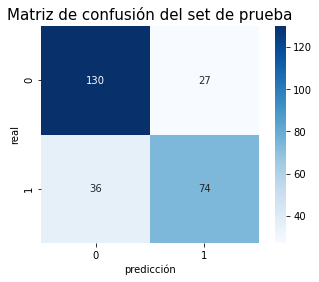

Test accuracy =  0.7640449438202247


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

x = df[['Pclass', 'Sex', 'Age','Fare', 'C','Q','S','FamilySize']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
model = sm.Logit(y_train, X_train).fit()
y_pred_proba = model.predict(X_test)
y_pred = list(map(round, y_pred_proba)) 

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()


# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

Hemos obtenido un valor de accuracy de 0.8%, este es un indicadot de qué tan bien clasifica el modelo, está dado por: TN+TP/Total.

A continuación se muestra la curva ROC 

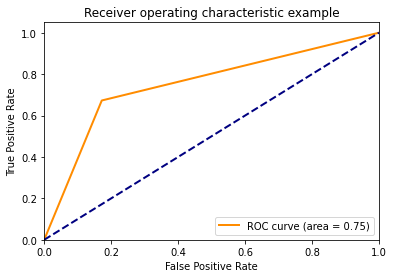

In [71]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

El área debajo de la curva representa la habilidad del modelo para discriminar entre la clase negativa y la positiva. Un área de 1 representa un modelo que ha hecho todas las predicciones perfectas, mientras que un área de 0.5 representa el rendimiento de un modelo aleatorio. En este caso, el area es 0,75, lo cual esta bastante por encima de ser aleatorio. 

* Predicciones:

Vamos a predecir la probabilidad de sobrevivir o no de una pasajera de sexo femenino, de tercera clase, de 25 años, que pagó un ticket de 7.5, que embarcó en S y que viajó con su marido: 

In [72]:
Xtest = [3, 0, 25, 5.5, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que una mujer de 25 años, que viajó en tercera clase con su marido, se embarcó en el puerto S y pagó un ticket de 5.5 USD es: ", ypred*100)

La probabilidad de que una mujer de 25 años, que viajó en tercera clase con su marido, se embarcó en el puerto S y pagó un ticket de 5.5 USD es:  [83.91905812]


In [73]:
Xtest = [3, 1, 25, 5.5, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que un hombre de 25 años, que viajó en tercera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 5.5 USD es: ", ypred*100)

La probabilidad de que un hombre de 25 años, que viajó en tercera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 5.5 USD es:  [23.13138553]


In [74]:
Xtest = [1, 0, 25, 10.5, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que una mujer de 25 años, que viajó en primera clase con su marido, se embarcó en el puerto S y pagó un ticket de 10.5 USD es: ", ypred*100)

La probabilidad de que una mujer de 25 años, que viajó en primera clase con su marido, se embarcó en el puerto S y pagó un ticket de 10.5 USD es:  [99.41012182]


In [75]:
Xtest = [1, 1, 25, 10.5, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que un hombre de 25 años, que viajó en primera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 10.5 USD es: ", ypred*100)

La probabilidad de que un hombre de 25 años, que viajó en primera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 10.5 USD es:  [90.66980087]


In [76]:
Xtest = [1, 1, 55, 15, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que un hombre de 55 años, que viajó en primera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 15 USD es: ", ypred*100)

La probabilidad de que un hombre de 55 años, que viajó en primera clase con su mujer, se embarcó en el puerto S y pagó un ticket de 15 USD es:  [96.81725953]


In [77]:
Xtest = [0, 1, 55, 15, 0, 0, 1, 1]
ypred = model.predict(Xtest)
print("La probabilidad de que una mujer de 55 años, que viajó en primera clase con su marido, se embarcó en el puerto S y pagó un ticket de 15 USD es: ", ypred*100)

La probabilidad de que una mujer de 55 años, que viajó en primera clase con su marido, se embarcó en el puerto S y pagó un ticket de 15 USD es:  [98.53383572]


In [78]:
Xtest = [1, 1, 1, 10, 1, 0, 0, 2]
ypred = model.predict(Xtest)
print("La probabilidad de que un niño de 1 año, que viajó en primera clase con sus padres, se embarcó en el puerto C y pagó un ticket de 10 USD es: ", ypred*100)

La probabilidad de que un niño de 1 año, que viajó en primera clase con sus padres, se embarcó en el puerto C y pagó un ticket de 10 USD es:  [93.91665878]


In [79]:
Xtest = [3, 1, 1, 7, 1, 0, 0, 2]
ypred = model.predict(Xtest)
print("La probabilidad de que un niño de 1 año, que viajó en tercera clase con sus padres, se embarcó en el puerto C y pagó un ticket de 7 USD es: ", ypred*100)

La probabilidad de que un niño de 1 año, que viajó en tercera clase con sus padres, se embarcó en el puerto C y pagó un ticket de 7 USD es:  [50.44484815]


## 6. Resolución del problema

Para resolver la pregunta de cuál es la variable que más influye al momento de determinar si un pasajero sobrevivió o no al hundimiento del Titanic aplicamos el test de Spearman, que es una alternativa no paramétrica a la correlación de Pearson para medir el grado de dependencia entre variables. 
Pudimos observar que la principal dependencia aparecía entre la variable Survived y Sex, con un coeficiente de -0,54, y luego seguía la dependencia moderada/débil entre Survived y Pclass (-0.34) y entre Survived y Fare (0.32). 

La segunda pregunta que queríamos resolver era si podíamos inferir a partir de esta muestra que la proporción de pasajeros sobrevivientes que embarcaron en el puerto Cherbourg fue mayor a la proporción de sobrevivientes que embarcaron en el puerto Queenstown. 
Estamos frente a un test de proporción de dos muestras bilateral por la derecha.
Para resolverla utilizamos el test Z de proporción de dos muestras independientes, seteando la alternativa "greater" ya que nuestra hipótesis alternativa es que la proporción de la primera muestra (los sobrevivientes que embarcaron en C) era mayor que la segunda (los sobrevivientes que embarcaron en Q). Pudimos concluir con un nivel de confianza del 95%, que la hipótesis alternativa era cierta. 

Luego nos planteamos la pregunta de si el valor promedio del ticket que pagaron aquellos pasajeros que sobrevivieron era mayor al que pagaron aquellos que no sobrevivieron. En este caso estamos ante un test de contraste de hipótesis de dos muestras independientes sobre la media, y particularmente este caso se trata de un contraste biilateral por la derecha (ya que la hipótesis alternativa indica que la media es mayor). 
Para resolverlo utilizamos el T-test para las medias de dos muestras independientes, obtuvimos como resultado que con un 95% de confianza, el valor del ticket promedio que pagaron los pasajeros que sobrevivieron es mayor al valor del ticket promedio que pagaron aquellos que no sobrevivieron.

Por último, creamos un modelo de regresión logística para poder predecir si un pasajero sobrevivirá o no teniendo en cuenta algunas variables independientes. Para poder determinar qué variables utilizar probamos distintas combinaciones y nos quedamos con el modelo que devolvió el menor AIC. Luego, pudimos utilizar este modelo para predecir la probabilidad de que un pasajero sobreviva dadas ciertos valores de: Sexo, Clase, Valor del ticket, Tamaño de la familia y el puerto de embarque. 
* Según los resultados que vimos, podemos sacar algunas conclusiones:
    - Si el pasajero viajó en tercera clase, la probabilidad de sobrevivir es menor que si viajo en primera
    - Si el pasajero era hombre, la probabilidad de sobrevivir es menor que si era mujer.
    - Si el pasajero era hombre de tercera clase la probabilidad de sobrevivir es muy baja.
    - Si el pasajero era un niño o bebé las probabilidades de sobrevivir son más altas.